In [1]:
# import pandas package
import pandas as pd

# import titanic dataset
raw_train_dataset = pd.read_csv("titanic_train_data.csv")

# View the top of the titanic dataset
raw_train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Get count of columns

raw_train_dataset.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [4]:
# Run this cell to see what happens to the number of examples in a training set when we drop all of the NA's

df_test = raw_train_dataset
df_test = df_test.dropna()
df_test.count()

PassengerId    183
Survived       183
Pclass         183
Name           183
Sex            183
Age            183
SibSp          183
Parch          183
Ticket         183
Fare           183
Cabin          183
Embarked       183
dtype: int64

In [5]:
# Dropping PassengerId, Name, Ticket, Cabin, Age

df_1 = raw_train_dataset.copy()

df_1 = df_1.drop(columns=["PassengerId","Name", "Ticket", "Cabin", "Age"])

In [6]:
# Visualise top of dataframe after dropping columns

df_1.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [7]:
# Get value counts of each of the female and male passengers

df_1['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
# Get value counts of each of the embarked features

df_1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
# Number of males and females

df_1['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
# Number of males and females who survived

df_1.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex'>

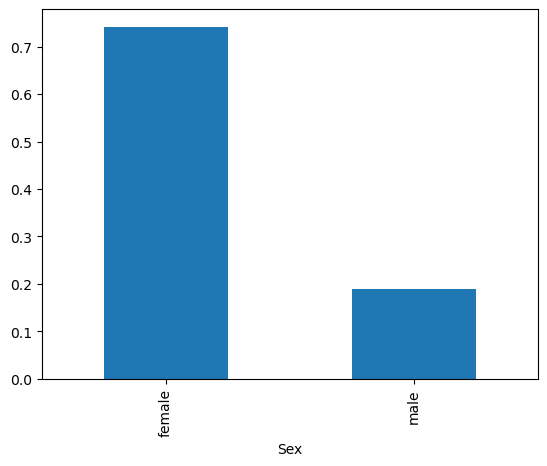

In [11]:
# Average survival rate by sex

df_1.groupby('Sex')['Survived'].mean().plot(kind='bar')


In [12]:
# Number of passengers from Pclass feature

df_1['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
# Number of passengers from Pclass feature that survived

df_1.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<Axes: xlabel='Pclass'>

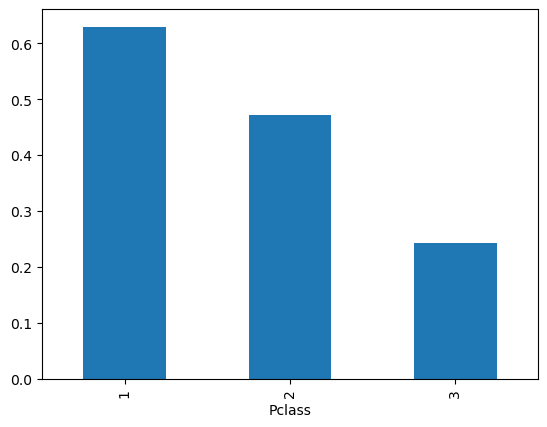

In [14]:
# Average survival rate by Pclass

df_1.groupby('Pclass')['Survived'].mean().plot(kind='bar')


In [15]:
# Preview the top of the DataFrame

df_1.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [16]:
# Get categorical columns for Sex feature

df_1 = pd.get_dummies(df_1, columns=["Sex"])

In [17]:
# Get categorical columns for Embarked feature
df_1 = pd.get_dummies(df_1, columns=['Embarked'])

In [18]:
#inspect our data here
df_1.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,0,1,0,0,1
1,1,1,1,0,71.2833,1,0,1,0,0
2,1,3,0,0,7.9250,1,0,0,0,1
3,1,1,1,0,53.1000,1,0,0,0,1
4,0,3,0,0,8.0500,0,1,0,0,1


In [19]:
# Use drop the Survived column from df_1, and save to the X variable
X = df_1.drop(columns='Survived')


# Save the survived column as the Y variable
Y = df_1['Survived']



In [21]:
# Duplicate df to check the Pclass performance when get dummies is used
new_test_df = df_1
new_test_df = df_1 = pd.get_dummies(df_1, columns=["Pclass"])
new_test_df.head()

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,0,0,8.0500,0,1,0,0,1,0,0,1


In [22]:
#check to make sure we can get view the data properly 
new_test_df.head()

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,0,0,8.0500,0,1,0,0,1,0,0,1


There are multiple ways. Sklearn is popular, there are some people in the industry still use statsmodel (I don't know why) but we must be exposed to both of the methods here 

In [23]:
# Train and fit the logistic regression model on the training data
import statsmodels.formula.api as smf
log_reg = smf.logit("Survived ~ C(Pclass_1) + C(Pclass_2) + C(Pclass_3) + C(Sex_female) + C(Sex_male) + SibSp + Fare + C(Embarked_C) + C(Embarked_Q) + C(Embarked_S)",data=df_1).fit(maxiter=20000)

Optimization terminated successfully.
         Current function value: 0.455125
         Iterations 2310


In [24]:
# Summary of the logistic regression model
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Fri, 31 Mar 2023   Pseudo R-squ.:                  0.3165
Time:                        08:38:03   Log-Likelihood:                -405.52
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.052e-76
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            1.19e+04   1.46e+07      0.001      0.999   -2.87e+07    2.87e+07
C(Pclass_1)[T.1]    3965.9488        nan        nan        nan         nan         nan
C(Pclass_2)[T.1]    3965.3960        nan        nan        nan         nan         nan
C(Pclass_3)[T.1]    3964.3192        nan        nan        nan         nan         nan
C(Sex_female)[T.1]  5949.1720   1.16e+07      0.001      1.000   -2.28e+07    2.28e+07
C(Sex_male)[T.1]    5946.4879   1.16e+07      0.001      1.000   -2.28e+07    2.28e+07
C(Embarked_C)[T.1] -2.181e+04        nan        nan        nan         nan         nan
C(Embarked_Q)[T.1] -2.181e+04        nan        nan        nan         nan         nan
C(Embarked_S)[T.1] -2.181e+04        nan        nan        nan         nan         nan
SibSp                 -0.2476      0.099     -2.510      0.012      -0.441      -0.054
Fare                   0.0027      0.002      1.132      0.258      -0.002       0.007
======================================================================================
"""

In [25]:
new_df_test = pd.get_dummies(df_test, columns=["Pclass", "Sex", "Embarked"]) #converted categorical columns into binary

new_df_test.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,0,0,0,1
6,7,0,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,1,0,0,0,1,0,0,1
10,11,1,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,0,0,1,1,0,0,0,1
11,12,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,1,0,0,1,0,0,0,1


In [26]:
new_df_test = new_df_test.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])


In [27]:
new_df_test.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
6,0,54.0,0,0,51.8625,1,0,0,0,1,0,0,1
10,1,4.0,1,1,16.7000,0,0,1,1,0,0,0,1
11,1,58.0,0,0,26.5500,1,0,0,1,0,0,0,1


In [28]:
import numpy as np
from sklearn.model_selection import train_test_split


# Drop our the Survived label from our X variable
X = new_df_test.drop(columns = 'Survived')

# Save our label, Survived, only to Y.
Y = new_df_test['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [29]:
# Create the logistic regression model

from sklearn.linear_model import LogisticRegression as lr

clf = lr(random_state=42).fit(X_train, y_train)

# Create predictions for the test set, using the logistic regression model
y_pred = clf.predict(X_test)

#calculate accuracy score
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred, y_test))

0.7567567567567568


c:\Users\eldes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Code cell for entire training set / test set
raw_test_dataset = pd.read_csv('titanic_test_data.csv')
raw_test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
raw_test_dataset.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [32]:
df_test_1 = raw_test_dataset.drop(columns=["PassengerId","Name", "Ticket", "Cabin"]) #drop unnecessary columns

df_test_1 = df_test_1.fillna(0) #fill NaN values with '0'

df_test_1.head() #view revised test dataset

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [33]:
new_df_test_1 = pd.get_dummies(df_test_1, columns=["Pclass", "Sex", "Embarked"]) #converted test data categorical values into binary

new_df_test_1.head() #view revised test dataset with binary categorical values

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


In [34]:
new_df_test_1.count()

Age           418
SibSp         418
Parch         418
Fare          418
Pclass_1      418
Pclass_2      418
Pclass_3      418
Sex_female    418
Sex_male      418
Embarked_C    418
Embarked_Q    418
Embarked_S    418
dtype: int64

In [35]:
test_predictions = clf.predict(new_df_test_1) #predict survival for passengers in test dataset

test_predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [36]:
raw_test_dataset['Survived'] = test_predictions #get predictions for test dataset

raw_test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [37]:
kaggle_csv = raw_test_dataset.copy() #copying predictions to file for submission
kaggle_csv = kaggle_csv[['PassengerId', 'Survived']]

kaggle_csv.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [38]:
kaggle_csv.to_csv("kaggle.csv", index=False)